<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/h_Jiyun/Chapter14_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## [Problem 14-1]

* 데이터 불러오기

In [2]:
# Data citation: Akbilgic, Oguz. (2013). ISTANBUL STOCK EXCHANGE. UCI Machine Learning Repository.
# data source website: https://archive-beta.ics.uci.edu/ml/datasets/istanbul+stock+exchange

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


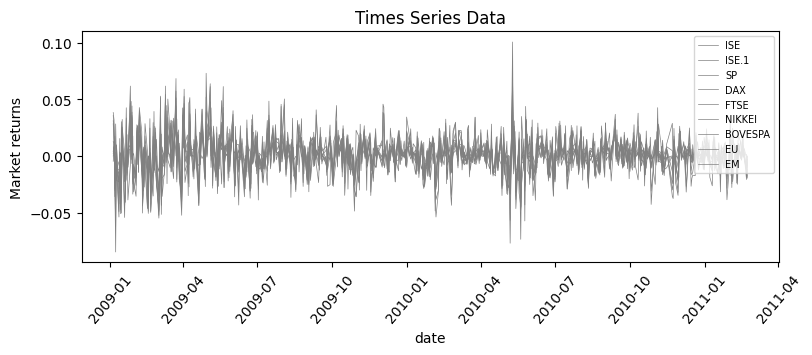

In [3]:
plt.figure(figsize=(9,3))
plt.plot(data.index,data.values, color='gray', linewidth='0.5')
plt.xlabel('date')
plt.ylabel('Market returns')
plt.title('Times Series Data')
plt.xticks(rotation=50)
plt.legend(data.columns, loc='upper right', fontsize=7)
plt.show()

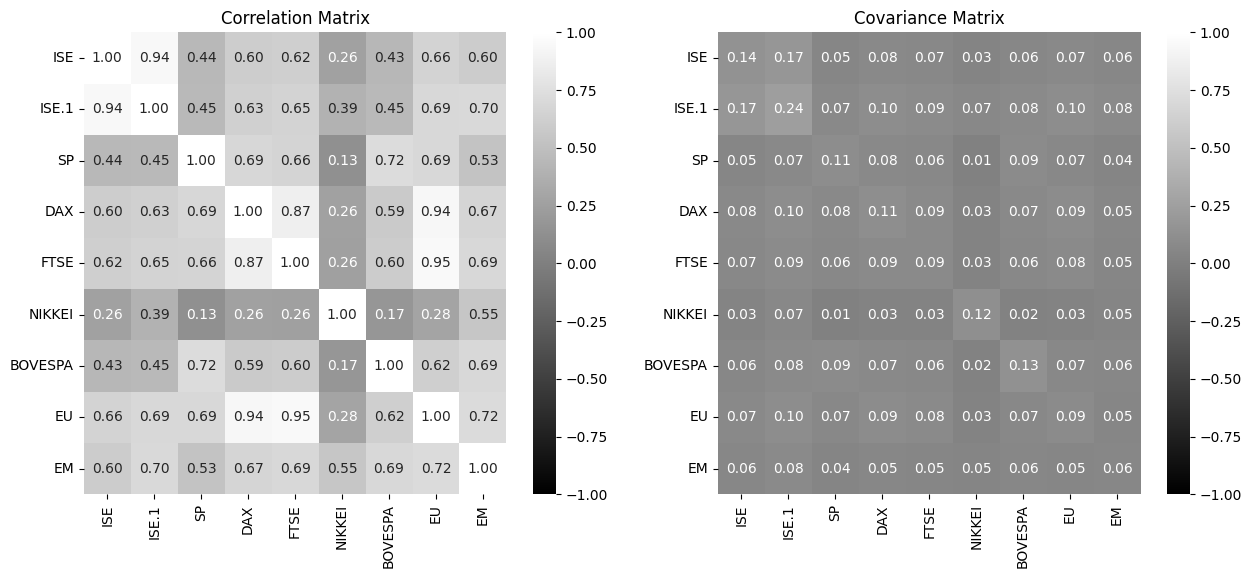

In [115]:
# 상관계수 계산
corr_matrix = data.corr()

# 상관계수 히트맵 그리기

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(corr_matrix, annot=True, cmap='gray', vmin=-1, vmax=1, fmt='.2f', cbar=True)
plt.title('Correlation Matrix')

plt.subplot(1,2,2)
sns.heatmap(data.T@data, annot=True, cmap='gray', vmin=-1, vmax=1, fmt='.2f', cbar=True)
plt.title('Covariance Matrix')
plt.show()

* PCA 수행

In [138]:
data_meancentered = data - data.mean()
covmat = data_meancentered.T@data_meancentered

In [139]:
val, vec = np.linalg.eig(covmat)

In [147]:
# 정렬
order  = np.argsort(val)[::-1]
val = val[order]
vec = vec[:,order]

array([0.69582076, 0.152931  , 0.10434238, 0.06555611, 0.03234392,
       0.01298142, 0.01198228, 0.00686659, 0.00267555])

In [148]:
# 구성요소
components = data.values @ vec[:,0:2]
# 분산비율
var_ratio = val/np.sum(val)

array([[ 0.05515907,  0.01588742],
       [ 0.04781237,  0.00788756],
       [-0.0668532 ,  0.02447313],
       ...,
       [ 0.00420317, -0.0046523 ],
       [-0.03413884,  0.01099136],
       [-0.02605808, -0.01094944]])

In [146]:
# # Show that variance of the components equals the eigenvalue
# print('Variance of first two components:')
# print(np.var(components,axis=0,ddof=1)) # note the ddof=1! The default produces the biased variance.

# print(f'\nFirst two eigenvalues:')
# print(val[:2])

Variance of first two components:
[0.0013006  0.00028585]

First two eigenvalues:
[0.69582076 0.152931  ]


* 시각화

*허허.. 정답 코드를 많이 참고했다*

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'ISE'),
  Text(1, 0, 'ISE.1'),
  Text(2, 0, 'SP'),
  Text(3, 0, 'DAX'),
  Text(4, 0, 'FTSE'),
  Text(5, 0, 'NIKKEI'),
  Text(6, 0, 'BOVESPA'),
  Text(7, 0, 'EU'),
  Text(8, 0, 'EM')])

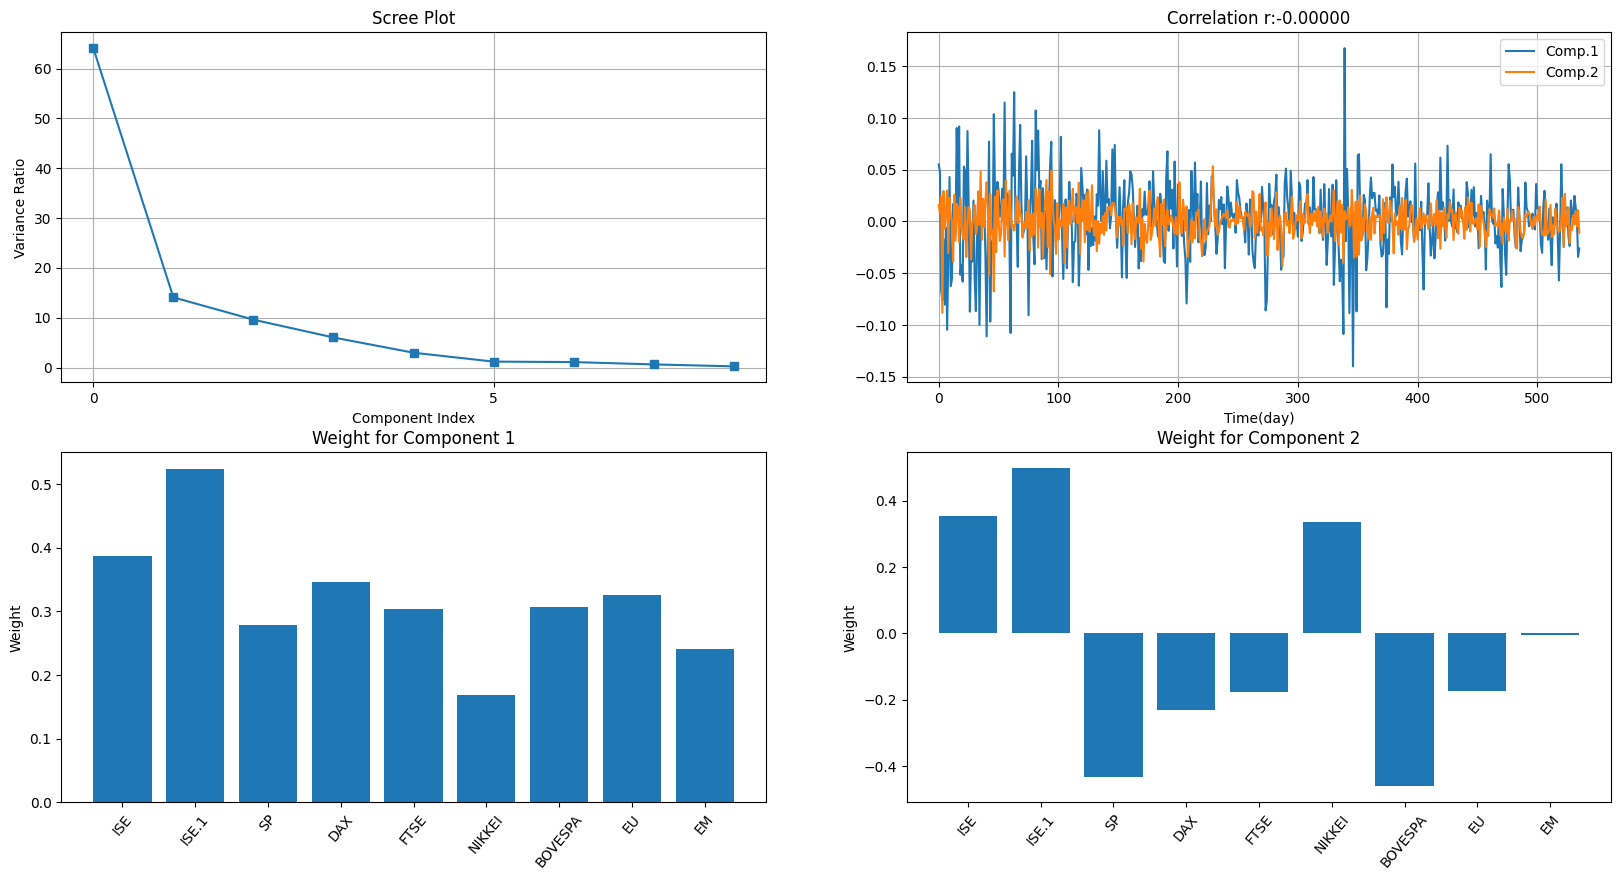

In [162]:
plt.figure(figsize=(20,10))
# 스크리 도표
plt.subplot(2,2,1)
plt.plot(var_ratio*100, marker='s')
plt.xticks([0,5])
plt.grid()
plt.xlabel('Component Index')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')

#
plt.subplot(2,2,2)
plt.plot(components)
plt.grid()
plt.legend(['Comp.1', 'Comp.2'])
plt.xlabel('Time(day)')
plt.title(f'Correlation r:{np.corrcoef(components.T)[0,1]:.5f}')

# 구성 요소 0의 가중치
plt.subplot(2,2,3)
plt.bar(data.columns, vec[:,0])
plt.ylabel('Weight')
plt.title("Weight for Component 1")
plt.xticks(rotation=50)

# 구성 요소 0의 가중치
plt.subplot(2,2,4)
plt.bar(data.columns, vec[:,1])
plt.ylabel('Weight')
plt.title("Weight for Component 2")
plt.xticks(rotation=50)

##[Problem 14-2]

* 공분산 행렬의 SVD

In [174]:
U, s, Vt = np.linalg.svd(covmat)

print('First 2 eigenvalues')
print(val[0:2])
print('First 2 singular values')
print(s[0:2])
print('')
print('First 2 eigenvectors')
print(vec[:,0:2])
print('First 2 singular vectors')
print(Vt[0:2])

First 2 eigenvalues
[0.69582076 0.152931  ]
First 2 singular values
[0.69582076 0.152931  ]

First 2 eigenvectors
[[ 0.3864847   0.35298874]
 [ 0.52390953  0.49823792]
 [ 0.27860507 -0.43379401]
 [ 0.34621538 -0.23047826]
 [ 0.30322542 -0.17721358]
 [ 0.16781756  0.33454308]
 [ 0.30741897 -0.46063876]
 [ 0.32544121 -0.17416684]
 [ 0.24111348 -0.00381729]]
First 2 singular vectors
[[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
  -0.30741897 -0.32544121 -0.24111348]
 [-0.35298874 -0.49823792  0.43379401  0.23047826  0.17721358 -0.33454308
   0.46063876  0.17416684  0.00381729]]


* 데이터 행렬 자체의 SVD

In [180]:
U, s, Vt = np.linalg.svd(data_meancentered)
s_squared = s**2
print('First 2 eigenvalues')
print(val[0:2])
print('First 2 singular values')
print(s[0:2])
print('First 2 squared singular values')
print(s_squared[0:2])
print('')
print('First 2 eigenvectors')
print(vec[:,0:2])
print('First 2 singular vectors')
print(Vt[0:2])

First 2 eigenvalues
[0.69582076 0.152931  ]
First 2 singular values
[0.83415871 0.39106393]
First 2 squared singular values
[0.69582076 0.152931  ]

First 2 eigenvectors
[[ 0.3864847   0.35298874]
 [ 0.52390953  0.49823792]
 [ 0.27860507 -0.43379401]
 [ 0.34621538 -0.23047826]
 [ 0.30322542 -0.17721358]
 [ 0.16781756  0.33454308]
 [ 0.30741897 -0.46063876]
 [ 0.32544121 -0.17416684]
 [ 0.24111348 -0.00381729]]
First 2 singular vectors
[[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
  -0.30741897 -0.32544121 -0.24111348]
 [-0.35298874 -0.49823792  0.43379401  0.23047826  0.17721358 -0.33454308
   0.46063876  0.17416684  0.00381729]]


## [Problem 14-3]

In [190]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

print('Explained varianve ratio from sklearn:')
print(pca.explained_variance_ratio_)
print('Eigenvalues:')
print(val)
print('')
print('Explained varianve ratio from sklearn:')
print(pca.components_[:4])
print('Eigenvectors:')
print(vec.T[:4])

Explained varianve ratio from sklearn:
[0.64101405 0.1408853  0.0961238  0.06039255 0.02979633 0.01195893
 0.01103849 0.00632574 0.00246481]
Eigenvalues:
[0.69582076 0.152931   0.10434238 0.06555611 0.03234392 0.01298142
 0.01198228 0.00686659 0.00267555]

Explained varianve ratio from sklearn:
[[ 0.3864847   0.52390953  0.27860507  0.34621538  0.30322542  0.16781756
   0.30741897  0.32544121  0.24111348]
 [ 0.35298874  0.49823792 -0.43379401 -0.23047826 -0.17721358  0.33454308
  -0.46063876 -0.17416684 -0.00381729]
 [-0.33940396 -0.21717495  0.0068195   0.00229672 -0.01055111  0.87202354
   0.13349569 -0.00184435  0.24336666]
 [ 0.14970844  0.1566995   0.14904863 -0.47869022 -0.37160553 -0.03928985
   0.63828975 -0.37424992  0.1206717 ]]
Eigenvectors:
[[ 0.3864847   0.52390953  0.27860507  0.34621538  0.30322542  0.16781756
   0.30741897  0.32544121  0.24111348]
 [ 0.35298874  0.49823792 -0.43379401 -0.23047826 -0.17721358  0.33454308
  -0.46063876 -0.17416684 -0.00381729]
 [ 0.339403

## [Problem 14-4]

In [312]:
x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

a=-np.pi/6
T1 = [[np.cos(a), -np.sin(a)],
     [np.sin(a), np.cos(a)]]
x1 = x@T1

a=-np.pi/3
T2 = [[np.cos(a), -np.sin(a)],
     [np.sin(a), np.cos(a)]]
x2 = x@T2

X = np.vstack((x1, x2))
x.shape

(1000, 2)

In [318]:
U, s, Vt = np.linalg.svd(X)

array([[-1.41561616, -1.41280957],
       [-1.41280957,  1.41561616]])

*이것도.......... 정답 코드를 많이 참고했다*

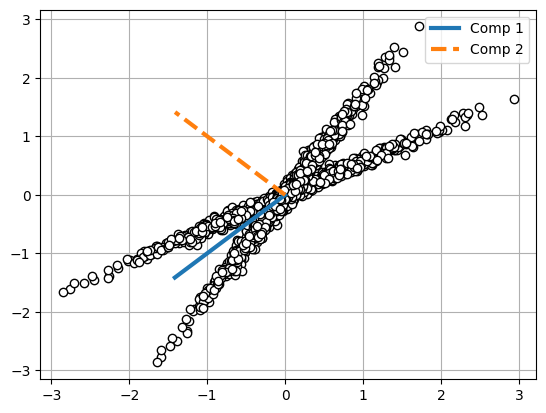

In [320]:
# 회전 행렬
plt.plot(X[:,0], X[:,1],'ko',markerfacecolor='w')

# 구성 요소
plt.plot([0,Vt[0,0]], [0, Vt[1,0]], linewidth=3, label='Comp 1')
plt.plot([0,Vt[0,1]], [0, Vt[1,1]],'--', linewidth=3, label='Comp 2')
plt.grid()
plt.legend()